In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [2]:
iris_data = pd.read_csv("../input/Iris.csv",index_col='Id')

In [3]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
iris_data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [4]:
iris_data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


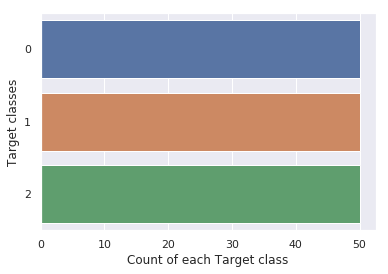

In [5]:
sns.countplot(y=iris_data.Species ,data=iris_data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

# PCA in action !

In [6]:
X = iris_data.drop(['Species'],axis=1)
y = iris_data.Species

In [7]:
covM = X.cov()
eigenvalues, eigenvectors = np.linalg.eig(covM)

print(eigenvalues)
print(eigenvectors)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [8]:
featureVector = eigenvectors[:,:2]
new2d = X.dot(featureVector)
new2d.head(3)

,0,1
Id,,
1,2.827136,-5.641331
2,2.795952,-5.145167
3,2.621524,-5.177378


# 2D Visualization

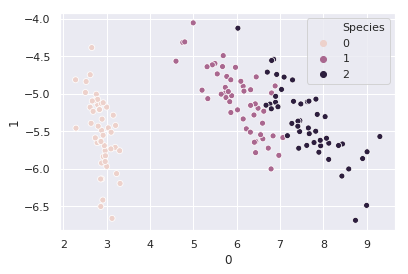

In [9]:
import seaborn as sns
sns.scatterplot(new2d[0], new2d[1], hue=y);

# 3D Visualization

In [10]:
featureVector = eigenvectors[:,:3]
new3d = X.dot(featureVector)
new3d.head(3)

,0,1,2
Id,,,
1,2.827136,-5.641331,-0.664277
2,2.795952,-5.145167,-0.846287
3,2.621524,-5.177378,-0.618056


/opt/conda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


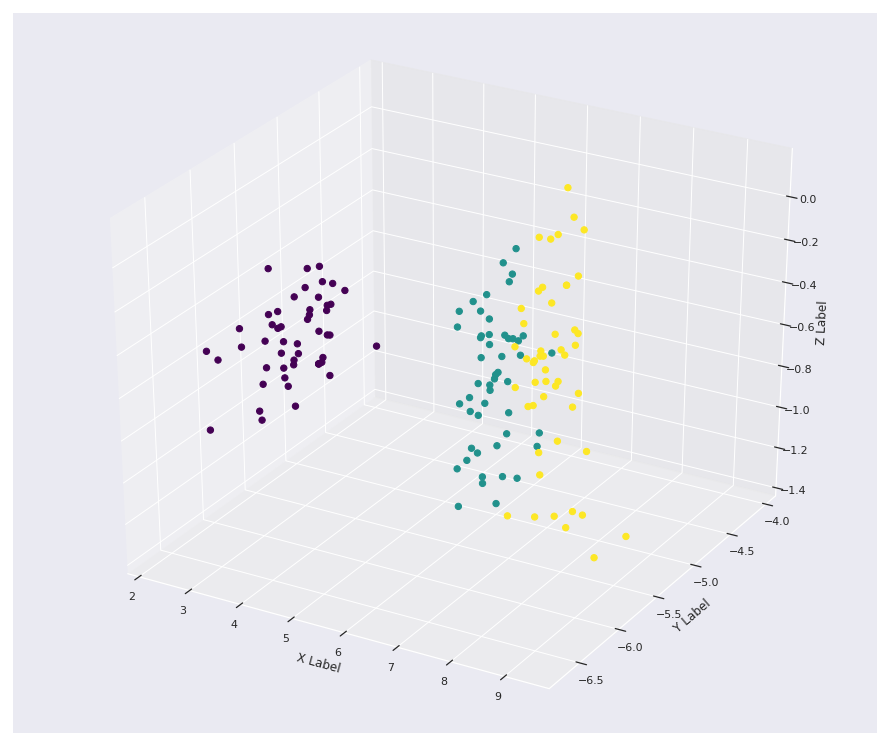

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib

n = 150

fig = plt.figure(figsize=(12,10))
ax = Axes3D(fig)
fig.add_axes(ax)

cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

sc = ax.scatter(new3d[0], new3d[1], new3d[2], s=40,c=y, marker='o',cmap=matplotlib.cm.get_cmap('viridis'),  alpha=1)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()